# Detecting Outliers in Datasets

This notebook demonstrates various techniques for detecting and dealing with outliers in datasets, including Z-score method, Interquartile Range (IQR) method, and visual detection using pandas, NumPy, and matplotlib.

**Learning Objectives:**
- Understand different approaches to detect outliers
- Learn Z-score and IQR methods for outlier detection
- Use visual techniques to identify outliers
- Compare removal vs. transformation of outliers

**Prerequisites:**
- Basic Python programming
- Familiarity with pandas, NumPy, and matplotlib
- Understanding of statistical concepts (mean, standard deviation, quartiles)

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Step 1: Generate Sample Data with Outliers

We'll create a synthetic dataset with normal distribution and add some extreme outliers to demonstrate outlier detection techniques.

In [2]:
# Sample data with outliers
np.random.seed(42)
data = np.random.normal(50, 10, 100)  # Generate normal data
data_with_outliers = np.append(data, [150, 160, 170])  # Add extreme outliers

df = pd.DataFrame({"Data": data_with_outliers})

print(f"Dataset shape: {df.shape}")
print(f"Basic statistics:\n{df.describe()}")

Dataset shape: (103, 1)
Basic statistics:
             Data
count  103.000000
mean    52.195665
std     20.834668
min     23.802549
25%     44.185369
50%     49.279899
75%     55.279137
max    170.000000


## Step 2: Z-Score Method for Outlier Detection

The Z-score method identifies outliers as data points that are more than a certain number of standard deviations away from the mean.

In [3]:
# Z-Score Method
z_scores = np.abs(stats.zscore(df["Data"]))
THRESHOLD = 3  # Common threshold for z-scores
outliers_z = df[z_scores > THRESHOLD]

print("Outliers detected using Z-Score method:")
print(outliers_z)
print(f"\nNumber of outliers detected: {len(outliers_z)}")

Outliers detected using Z-Score method:
      Data
100  150.0
101  160.0
102  170.0

Number of outliers detected: 3


## Step 3: Interquartile Range (IQR) Method

The IQR method uses the interquartile range to identify outliers. Data points beyond 1.5 * IQR from the quartiles are considered outliers.

In [4]:
# Interquartile Range (IQR) Method
Q1 = df["Data"].quantile(0.25)
Q3 = df["Data"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

outliers_iqr = df[(df["Data"] < lower_bound) | (df["Data"] > upper_bound)]

print("\nOutliers detected using IQR method:")
print(outliers_iqr)
print(f"\nNumber of outliers detected: {len(outliers_iqr)}")

Q1: 44.19
Q3: 55.28
IQR: 11.09
Lower bound: 27.54
Upper bound: 71.92

Outliers detected using IQR method:
           Data
74    23.802549
100  150.000000
101  160.000000
102  170.000000

Number of outliers detected: 4


## Step 4: Visual Detection of Outliers

Visual methods like scatter plots and box plots can help identify outliers graphically.

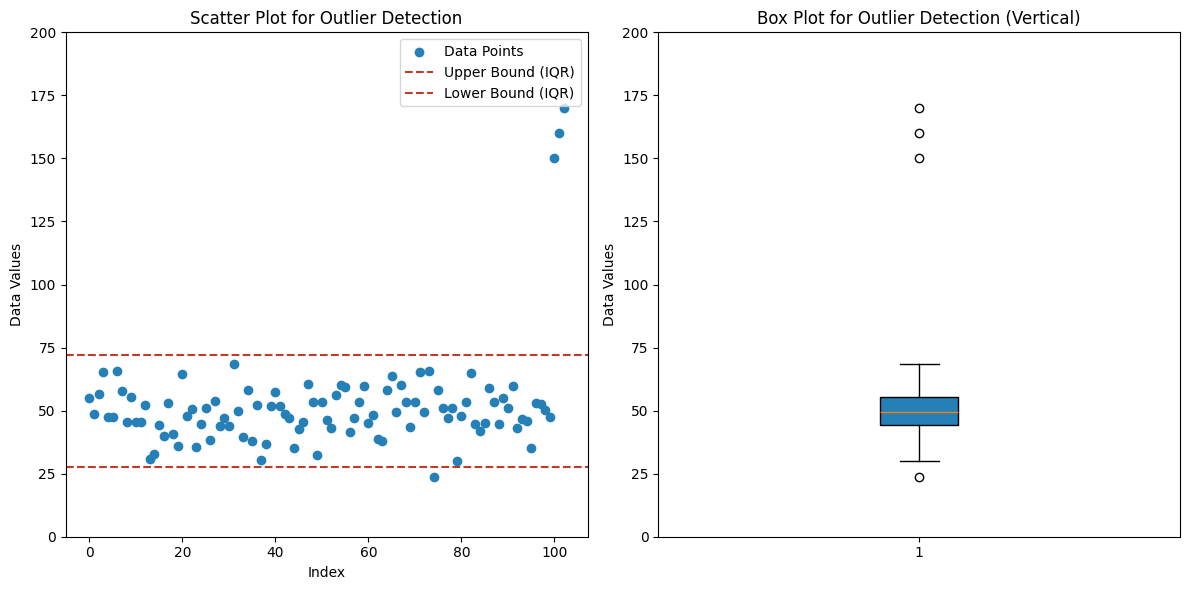

In [5]:
# Visual Detection
plt.figure(figsize=(12, 6))

# Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(
    range(len(df)), df["Data"], color="#2580B7", label="Data Points")
plt.axhline(
    y=upper_bound, color="#C03B26", linestyle="--", label="Upper Bound (IQR)")
plt.axhline(
    y=lower_bound, color="#C03B26", linestyle="--", label="Lower Bound (IQR)")

plt.title("Scatter Plot for Outlier Detection")
plt.xlabel("Index")
plt.ylabel("Data Values")
plt.ylim(0, 200)
plt.legend()

# Box Plot
plt.subplot(1, 2, 2)
plt.boxplot(
    df["Data"], vert=True, patch_artist=True,
    boxprops={
        "facecolor": "#2580B7"
    }
)

plt.title("Box Plot for Outlier Detection (Vertical)")
plt.ylabel("Data Values")
plt.ylim(0, 200)

plt.tight_layout()
plt.show()

## Step 5: Removing Outliers

One approach to handle outliers is to completely remove them from the dataset.

In [6]:
# Removing outliers using the IQR method
df_no_outliers = df[(df["Data"] >= lower_bound) & (df["Data"] <= upper_bound)]

print("Data after removing outliers (using IQR):")
print(f"Original dataset size: {len(df)}")
print(f"Dataset size after removal: {len(df_no_outliers)}")
print(f"Removed {len(df) - len(df_no_outliers)} outliers")
print(f"\nBasic statistics after removal:\n{df_no_outliers.describe()}")

Data after removing outliers (using IQR):
Original dataset size: 103
Dataset size after removal: 99
Removed 4 outliers

Basic statistics after removal:
            Data
count  99.000000
mean   49.215666
std     8.763243
min    30.124311
25%    44.185369
50%    48.843517
75%    54.362061
max    68.522782


## Step 6: Transforming Outliers (Capping)

Instead of removing outliers, we can transform them by capping to the upper and lower bounds.

In [7]:
# Transform outliers instead of removing them (capping to bounds)
df_transformed = df.copy()
df_transformed["Data"] = np.clip(df["Data"], lower_bound, upper_bound)

print("Data after correcting outliers (capping to bounds):")
print(f"Dataset size remains: {len(df_transformed)}")
print(f"\nBasic statistics after transformation:\n{df_transformed.describe()}")

Data after correcting outliers (capping to bounds):
Dataset size remains: 103

Basic statistics after transformation:
             Data
count  103.000000
mean    49.666554
std      9.661413
min     27.544716
25%     44.185369
50%     49.279899
75%     55.279137
max     71.919790


## Step 7: Compare Different Approaches

Let's visualize the comparison between original data, data after outlier removal, and data after transformation.

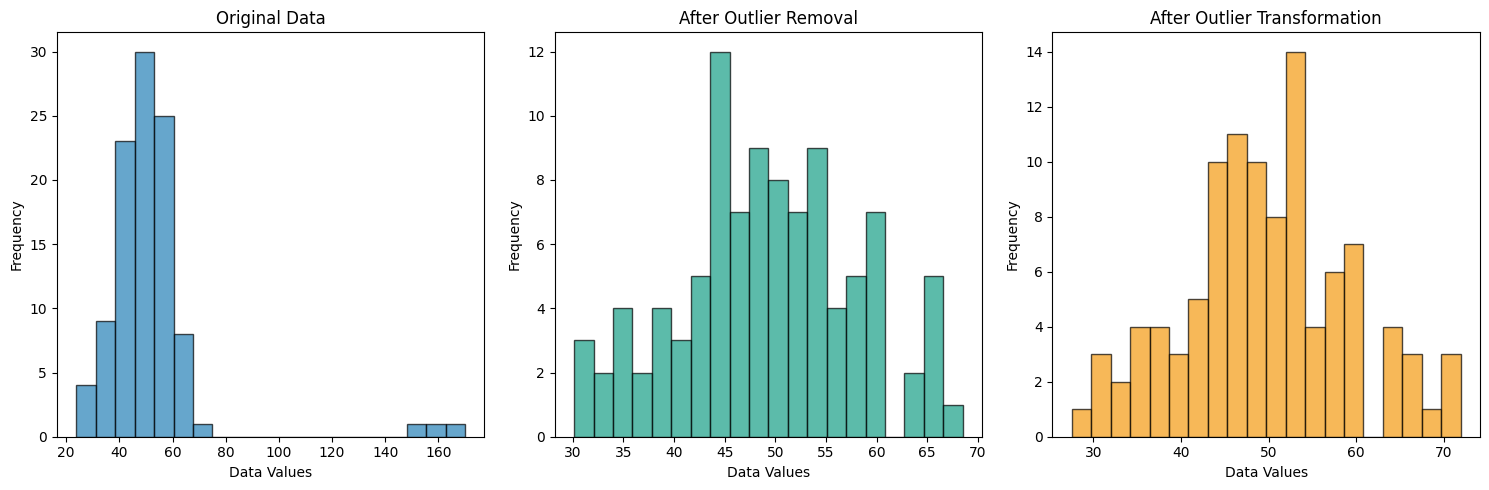

In [8]:
# Compare different approaches
plt.figure(figsize=(15, 5))

# Original data
plt.subplot(1, 3, 1)
plt.hist(df["Data"], bins=20, color="#2580B7", alpha=0.7, edgecolor="black")
plt.title("Original Data")
plt.xlabel("Data Values")
plt.ylabel("Frequency")

# After removal
plt.subplot(1, 3, 2)
plt.hist(df_no_outliers["Data"], bins=20, color="#179E86", alpha=0.7, edgecolor="black")
plt.title("After Outlier Removal")
plt.xlabel("Data Values")
plt.ylabel("Frequency")

# After transformation
plt.subplot(1, 3, 3)
plt.hist(df_transformed["Data"], bins=20, color="#F59B11", alpha=0.7, edgecolor="black")
plt.title("After Outlier Transformation")
plt.xlabel("Data Values")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## Summary

In this notebook, we explored different approaches to detect and handle outliers:

### Detection Methods:

1. **Z-Score Method**: Identifies outliers based on standard deviations from the mean
   - Pros: Simple, works well for normally distributed data
   - Cons: Sensitive to extreme outliers, assumes normal distribution

2. **IQR Method**: Uses quartiles to identify outliers
   - Pros: Robust to distribution shape, less sensitive to extreme values
   - Cons: May be too conservative for some datasets

3. **Visual Detection**: Uses plots to identify outliers graphically
   - Pros: Intuitive, allows for context-based decisions
   - Cons: Subjective, not suitable for automated processing

### Handling Strategies:

1. **Removal**: Completely removes outlier data points
   - Pros: Clean dataset, eliminates problematic values
   - Cons: Loss of information, potential bias if outliers are meaningful

2. **Transformation (Capping)**: Limits outliers to boundary values
   - Pros: Preserves sample size, reduces extreme influence
   - Cons: May distort the true distribution, arbitrary boundary selection

The choice of method depends on the nature of your data, the purpose of your analysis, and the context of the outliers. Often, understanding why outliers exist is as important as detecting them.